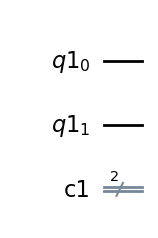

In [2]:
# Importing Qiskit
from qiskit import *
# Creating Quantum and Classical Registers
quantum_register= QuantumRegister(2)
classical_register= ClassicalRegister(2)
# Creating a Quantum Circuit
quantum_circuit= QuantumCircuit(quantum_register, classical_register)
# To view the circuit
quantum_circuit.draw(output='mpl')

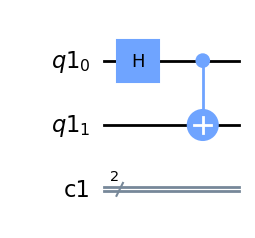

In [3]:
# Apply a Hadamard gate to the first qubit
quantum_circuit.h(0)
# Apply a CNOT gate to create the entangled state
quantum_circuit.cx(0, 1)
# Draw the circuit again
quantum_circuit.draw(output='mpl')